In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from math import pi
from utils import data_treatment
import autolab.autolab

In [2]:
plt.close()


In [3]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements\\230621"
os.listdir(path)
def filename (number: str) -> str:
    return f"{number} Linear Sweep Voltammetry.dat"

def area_circle(diameter: float) -> float:
    return pi * (0.5 * diameter)**2

def current_density(current):
    area = area_circle(0.05)
    return current/area

filename_list = ["002", "004", "007"]

# for file in filename_list:
#     full_path = os.path.join(path, filename(file))
#     df = pd.read_table(full_path, sep = ",", skiprows = 14)
#     df["current density"] = df[" Current WE1 [A]"].map(current_density)
#     plt.plot(df["# Potential [V]"], df[" Current WE1 [A]"], label = file)
#     plt.legend()
#     plt.xlabel("Potential [V]")
#     plt.ylabel("current density [j/ cm^2]")

In [ ]:
df = pd.read_table(full_path, sep = ",", skiprows= 14)
df

In [ ]:
df["current density"] = df[" Current WE1 [A]"].map(current_density)

In [ ]:
plt.plot(df["# Potential [V]"], df["current density"])

In [4]:
config = {
    'adk': 'E:\\Metrohm\\config\\Adk',
    'sdk': 'E:\\Metrohm\\EcoChemie.Autolab.Sdk',
    'hsf': 'E:\\Metrohm\\Hardware Setup Files\\PGSTAT302N\\HardwareSetup.xml',
    'sim': False
}
potentiostat = autolab.autolab.potentiostat(config)

In [ ]:
directory = os.path.join(data_treatment.gdrive_path, "sdc experiments")
files = os.listdir(directory)

In [ ]:
for file in files:
    df = potentiostat.nox_parser(os.path.join(directory,file), "LSV staircase")
    plt.figure()
    plt.plot(df["Potential applied"], df["WE(1).Current"], label = file)
plt.show

In [ ]:
name = "line sweep"

for n in range(5):
    filename = os.path.join(path, f"secmpy semiauto test {n}.nox")
    print(filename)

In [ ]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements"
directory_content= os.listdir(path)

In [ ]:
plt.rcParams['figure.dpi'] = 300
for item in directory_content:
    object_path = os.path.join(path, item)
    if os.path.isdir(object_path):
        plt.figure()
        for file in os.listdir(object_path):
            file_path = os.path.join(object_path, file)
            df = pd.read_table(file_path, sep = ",", skiprows = 14)
            df["current density"] = df[" Current WE1 [A]"].map(current_density)
            plt.plot(df["# Potential [V]"], df["current density"], label = file)
            plt.legend()
            plt.xlabel("Potential [V]")
            plt.ylabel("current density [j/ cm^2]")
            

In [5]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\Autolab\\NovaProcedure"
file = "011_010_NovaProcedure.nox"

OCP Histogram and Statistics on OCP Values


In [ ]:
ocp_data = pd.DataFrame(columns= ["OCP value"])
ocp_list = []
for file in os.listdir(path):
    if file.startswith("012_"):
        procedure = potentiostat.instrument.LoadProcedure(os.path.join(path, file))
        command = procedure.Commands["OCP determination"]
        ocp_list.append(command.Signals.get_Item("OCP value").Value)
ocp_data["OCP value"] = ocp_list

In [ ]:
#ocp_data = ocp_data.drop(index = 34)
ocp_data = ocp_data[ocp_data["OCP value"] < 0.5]
ocp_data = ocp_data[ocp_data["OCP value"] > -0.8]

In [ ]:
plt.rcParams['figure.dpi'] = 300
print(ocp_data.mean(), "mean")
print(ocp_data.std(), "std")
print(ocp_data.var(), "variance")
print(ocp_data.median(), "median")
ocp_data.hist(column=["OCP value"], bins = 15)
plt.grid(False)
plt.xlabel("E [V]")

In [7]:
procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
for command in procedure.Commands.Names:
    print(command)

Cyclic voltammetry potentiostatic
Autolab control
OCP determination
E vs t
Custom
!!Hidden command, this should not be displayed
Set potential
Set cell
Wait time (s)
Optimize current range
CV staircase
i vs E
Set cell


In [8]:
command = procedure.Commands["CV staircase"]
for column in command.Signals.Names:
    print(command.Signals.get_Item(column).Value)
    print(column)

System.Double[]
Potential applied
System.Double[]
Time
System.Double[]
WE(1).Current
System.Double[]
WE(1).Potential
System.Int32[]
Scan
System.Int32[]
Index
System.Double[]
Q+
System.Double[]
Q-


CV Analysis


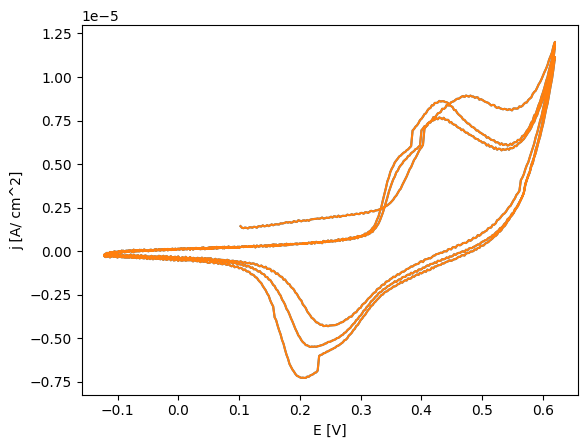

In [14]:
command = procedure.Commands["CV staircase"]
scan = 1
list_of_files = []
for file in os.listdir(path):
    if file.startswith("011_"):
        list_of_files.append(file)

data_list = []
for file in list_of_files:
    df = pd.DataFrame()
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)
    data_list.append(df)

for df in data_list[0:2]:   
    df["current density"] = df["WE(1).Current"].map(current_density)
    #df = df.loc[df['Scan'] == scan]
    plt.plot(df["Potential applied"], df["WE(1).Current"])
    plt.xlabel("E [V]")
    plt.ylabel("j [A/ cm^2]")

In [ ]:
#df_scan["current density"] = df_scan["WE(1).Current"].map(current_density)
plt.plot(df["Potential applied"], df["current density"], label = file)
plt.legend()
plt.xlabel("E [V]")
plt.ylabel("j [A/ cm^2]")

In [ ]:
for scan in range(3):
    df_scan = df.loc[df['Scan'] == scan+1]
    plt.plot(df_scan["Potential applied"], df_scan["current density"], label = file + " " + str(scan))
    plt.legend()
    plt.xlabel("E [V]")
    plt.ylabel("j [A/ cm^2]")